In [5]:
%matplotlib inline

In [6]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import mglearn

###Representing Data and Engineering Features
Categorical Variables

One-Hot-Encoding (Dummy variables)

In [8]:
import pandas as pd

data = pd.read_csv("/Users/jeewonkim/Git/TIL/SeoulTech/Business_Analytics/adult.data", header=None, index_col = False, 
                   names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


Checking string-encoded categorical data

In [9]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [10]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [11]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape,y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Test score: {:.2f}".format(logreg.score(X_test,y_test)))

Test score: 0.81


/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Numbers Can Encode Categoricals

scikit-learn에서도 One Hot Encoding을 수행할 수 있음. 훈련 세트와 테스트 세트를 같은 방식으로 다루기 쉬운 것이 장점.

In [14]:
demo_df = pd.DataFrame({'Integer Feature':[0,1,2,1], 'Categorical Feature':['socks','fox','socks','box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [15]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [16]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns = ['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn

In [17]:
from sklearn.preprocessing import OneHotEncoder

# sparse를 False로 설정하면 numpy array반환, True로 설정하면 희소 행렬로 반환
ohe = OneHotEncoder(sparse = False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


scikit-learn의 출력은 DataFrame이 아니기에 열 이름이 없음. 변환된 특성에 해당하는 원본 범주형 변수의 이름을 얻으려면 ``get_feature_names``를 사용하면 됨


In [18]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_box' 'x1_fox' 'x1_socks']


/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


- 대부분 데이터셋에서 일부 특성은 범주형, 일부는 연속형
- OneHotEncoder는 모든 특성을 범주형이라고 가정
- ``ColumnTransformer``를 사용하면 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있음. 연속형 특성과 범주형 특성은 다른 종류의 전처리 과정이 필요하기에 유용함

#####위의 예시에선?
위의 데이터셋에 선형 모델을 적용하여 소득 예측하려면 범주형 변수에 One-Hot-Encoding을 적용하고 연속형인 변수인 age와 hours-per-week의 스케일도 조정해야 함. 이때 ``ColumnTranformer`` 필요.

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
# 44개의 특성이 만들어짐
print(X_train_trans.shape)

(24420, 44)


In [22]:
# 선형회귀 적용

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans,y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.81


In [23]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

Convenient ColumnTransformer creation with ``make_columntransformer``

- ColumnTransformer를 만들면 각 단계에 이름을 지정해야 하기에 번거움. 이를 위해 클래스 기반으로 자동으로 각 단계에 이름을 붙여줌

In [24]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (['age','hours-per-week'], StandardScaler()),
    (['workclass','education','gender','occupation'], OneHotEncoder(sparse = False))
)

Binning, Discretization, Linear Models, and Trees

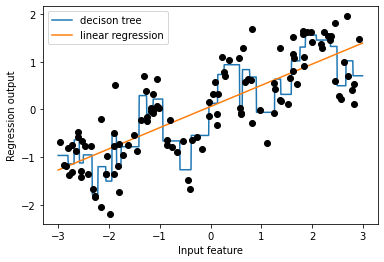

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)


# wave데이터셋을 이용해서 선형 회귀 모델과 결정 트리 회귀를 비교한 결과
reg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X,y)
plt.plot(line, reg.predict(line), label = 'decison tree')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), label = "linear regression")

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')

- Linear Regression : 선형 관계로만 모델링하므로 특성이 하나일땐 직선으로 나타남
- DecisionTree : 선형 모델과 같은 데이터로 훨씬 복잡한 모델을 만들 수 있음

**<U>구간 분할(binding) : 연속형 데이터에 강력한 모델을 만드는 방법 중 하나</U>**

위의 그래프에서 특성을 10개의 구간으로 나누었다고 생각해보면 각 데이터 포인터가 어떤 구간에 속하는지 나타낼 수 있음. 구간의 경계를 정의하는 데에는 균일한 너비(구간의 경계 간의 거리가 동일)로 하거나 데이터의 분위(데이터가 많은 구간은 좁아짐)를 사용할 수 있음.

In [26]:
from sklearn.preprocessing import KBinsDiscretizer

In [27]:
# uniform : 균일하게 나눔
kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [28]:
# transform : 각 데이터 포인트를 해당하는 구간으로 인코딩
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [29]:
print(X[:10])
X_binned.toarray()[:10]

# 첫번째 데이터 포인트 -0.75275929가 4번째 구간에 포함됨ㅍ
# 두번째 데이터 포인트 2.70428584가 마지막(10번째) 구간에 포함됨

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [30]:
kb = KBinsDiscretizer(n_bins=10, strategy = 'uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, 'Input feature')

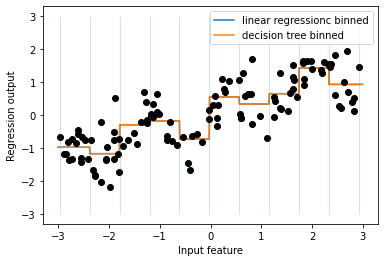

In [31]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), label = 'linear regressionc binned')

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

**위 그래프 해석**

- Linear Regression 모델과 Decisoin Tree 모델이 같은 예측을 만들어 내어 그래프가 겹쳤음
- Linear Regression : 구간으로 나눈 특성을 적용 후에는 각 구간에서 다른 값을 가지고 있기에 더 유연해짐
- Decision Tree : 덜 유연해짐. 구간으로 나눠 학습하기엔 이득이 없음.

Interactions and Polynomials

In [32]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)

(120, 11)


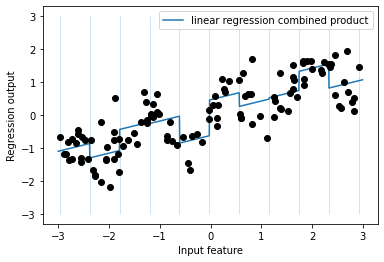

In [33]:
reg = LinearRegression().fit(X_combined,y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = "linear regression combined product")

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc='best')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:,0],y,'o', c='k')

In [34]:
X_product = np.stack([X_binned, X*X_binned])
print(X_product.shape)

(2, 120, 10)


참고
https://blog.naver.com/fbfbf1/222444014045